# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


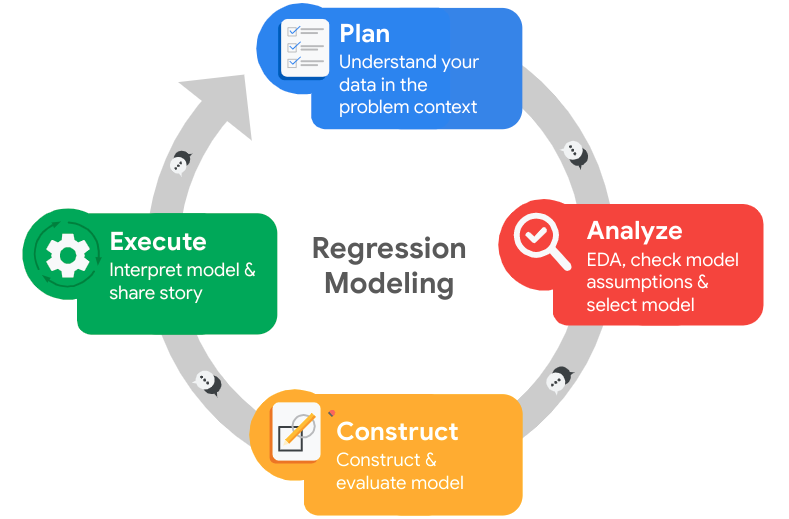

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [2]:
# Import packages
import pandas as pd
import numpy as np


from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,\
ConfusionMatrixDisplay,classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import plot_importance

import pickle

import matplotlib.pyplot as plt
import seaborn as sns


### Load dataset



In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)





### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df0['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### Gather descriptive statistics about the data

In [6]:
df0['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [8]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})



# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
df0.isna().any().sum()

0

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
df0.duplicated().sum()


3008

In [12]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


# Check whether all the duplicated rows are dropped
df1.duplicated().sum()


0

### Check outliers

Check for outliers in the data.

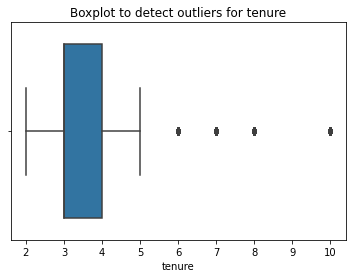

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

sns.boxplot(df1.tenure)
plt.title('Boxplot to detect outliers for tenure')
plt.show()



In [15]:
# Determine the number of rows containing outliers


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df1['tenure'].quantile(0.25)
Q3 = df1['tenure'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

print('Number of rows containing outliers:', len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers: 824


## Data Exploration (Continue EDA)



In [16]:
# Get numbers of people who left vs. stayed
print(f"Number of people left vs stayed: {df1['left'].value_counts()}")

# Get percentages of people who left vs. stayed
print(f"Percentage of people left vs stayed: {df1['left'].value_counts(normalize=True)}")


Number of people left vs stayed: 0    10000
1     1991
Name: left, dtype: int64
Percentage of people left vs stayed: 0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

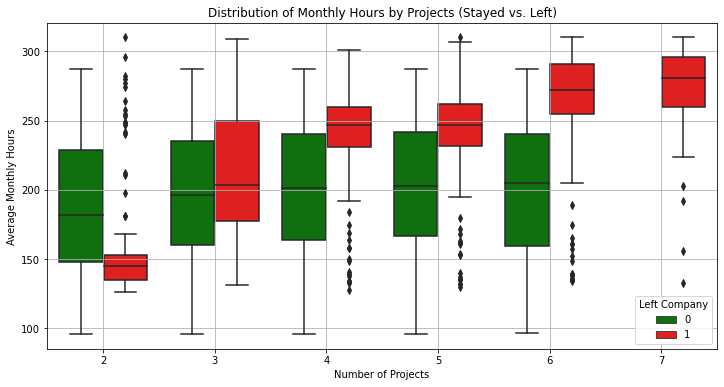

In [17]:
### YOUR CODE HERE ###


plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='number_project', y='average_monthly_hours', hue='left', palette={0: 'green', 1: 'red'})
plt.title('Distribution of Monthly Hours by Projects (Stayed vs. Left)')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Left Company')
plt.grid(True)
plt.show()




## 📈 Interpretation: Projects vs. Monthly Hours vs. Attrition

### 🔺 Higher Project Load & Long Hours → More Attrition
- For employees with **6 or 7 projects**, those who **left the company (red)** tend to have **higher average monthly hours** than those who stayed.
- This suggests that **work overload and long hours** may have **driven resignations**.

---

### ⚖️ Balanced Workload (2–4 Projects) → Lower Attrition
- In the **2 to 4 project range**, both **leavers and stayers** have **similar average hours**, and there's **less difference between red and green**.
- Indicates that this workload might be more **sustainable** and lead to **better retention**.

---

### 🚨 Extreme Cases (High Project Count)
- **Very high project counts (6–7)** show **significantly more red**, highlighting that employees with **too many responsibilities** were **more likely to leave**.

---

### ❗ Low Project Count (2–3)
- Surprisingly, some leavers are also found in the **low project categories** — possibly due to **boredom**, **lack of engagement**, or **dissatisfaction**, despite fewer responsibilities.


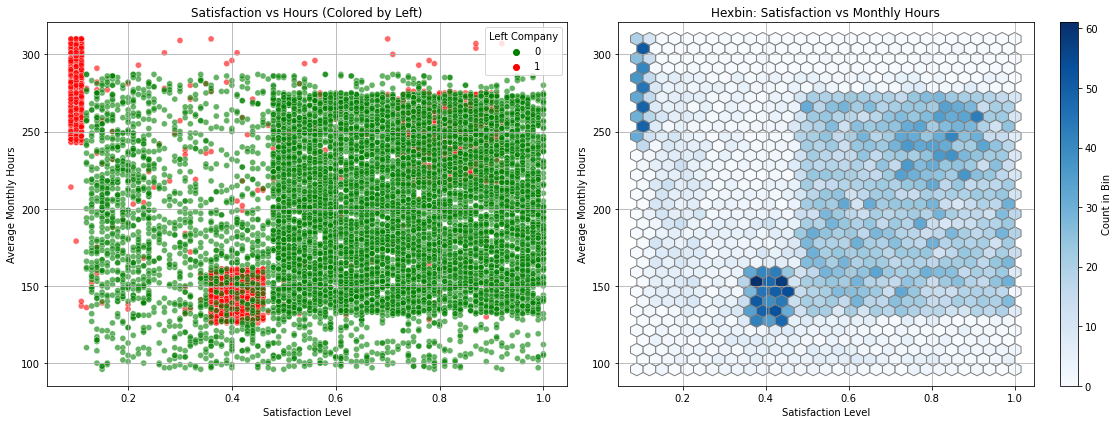

In [18]:
# Create a plot as needed

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. Scatter Plot (left) ---
sns.scatterplot(
    data=df1,
    x='satisfaction_level',
    y='average_monthly_hours',
    hue='left',
    palette={0: 'green', 1: 'red'},
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Satisfaction vs Hours (Colored by Left)')
axes[0].set_xlabel('Satisfaction Level')
axes[0].set_ylabel('Average Monthly Hours')
axes[0].legend(title='Left Company')
axes[0].grid(True)

# --- 2. Hexbin Plot (right) ---
hb = axes[1].hexbin(
    df1['satisfaction_level'],
    df1['average_monthly_hours'],
    gridsize=30,
    cmap='Blues',
    edgecolors='gray'
)
axes[1].set_title('Hexbin: Satisfaction vs Monthly Hours')
axes[1].set_xlabel('Satisfaction Level')
axes[1].set_ylabel('Average Monthly Hours')
cb = fig.colorbar(hb, ax=axes[1])
cb.set_label('Count in Bin')
axes[1].grid(True)

# Show both plots
plt.tight_layout()
plt.show()


## 📊 Plot Interpretation

### 🔍 Left Plot (Scatter Plot with Hue = Left Company)

- **Green dots (Stayed)** are densely clustered in the **middle satisfaction (0.4–0.7)** and **moderate hours (150–250)** range.
  
- **Red dots (Left)** appear in two prominent zones:
  - **Low satisfaction (0–0.2)** across a wide range of hours – indicating **dissatisfaction is a major factor**.
  - **High satisfaction (0.7–1.0)** with **very high hours (above ~250)** – suggesting **burnout or overwork**, despite being engaged or productive.
  
- A noticeable **red cluster** at **low satisfaction + moderate hours** suggests that some employees **leave even with normal workloads if they’re unhappy**.

---

### 🔷 Right Plot (Hexbin Density Plot)

- The **densest region (dark blue)** lies in the **moderate satisfaction and average monthly hours** range — this aligns with **most employees who stayed**.

- **Lighter blue areas** extend toward **lower satisfaction** and **higher hours**, where the **risk of turnover increases**.

- **Sparse regions** in extreme corners (very low satisfaction & very high hours) highlight **low population areas with high attrition risk** — important for targeted HR intervention.


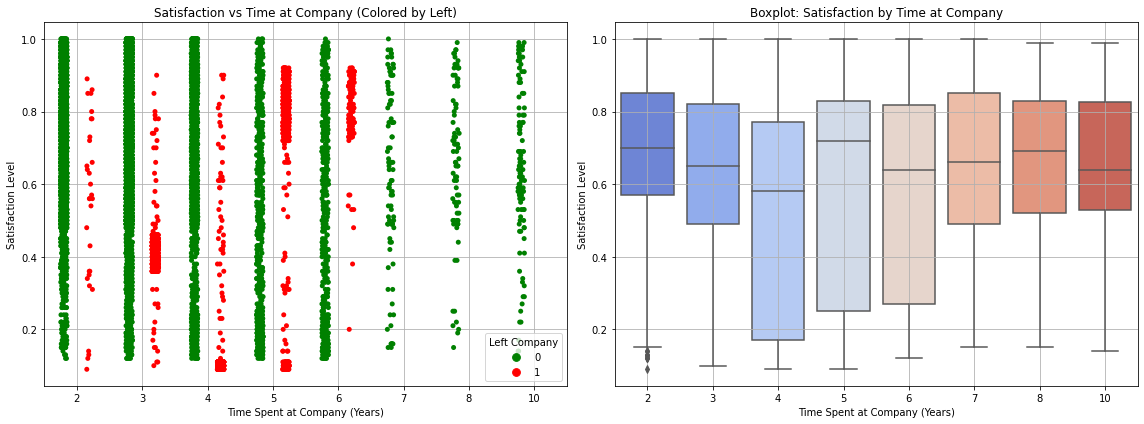

In [19]:
# Create a plot as needed

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. Stripplot: Satisfaction vs Time at Company (Colored by Left) ---
sns.stripplot(
    data=df1,
    x='tenure',
    y='satisfaction_level',
    hue='left',
    dodge=True,
    jitter=True,
    palette={0: 'green', 1: 'red'},
    ax=axes[0]
)
axes[0].set_title('Satisfaction vs Time at Company (Colored by Left)')
axes[0].set_xlabel('Time Spent at Company (Years)')
axes[0].set_ylabel('Satisfaction Level')
axes[0].legend(title='Left Company')
axes[0].grid(True)

# --- 2. Boxplot: Satisfaction Distribution by Time Spent ---
sns.boxplot(
    data=df1,
    x='tenure',
    y='satisfaction_level',
    ax=axes[1],
    palette='coolwarm'
)
axes[1].set_title('Boxplot: Satisfaction by Time at Company')
axes[1].set_xlabel('Time Spent at Company (Years)')
axes[1].set_ylabel('Satisfaction Level')
axes[1].grid(True)

# Layout
plt.tight_layout()
plt.show()

## 📊 Interpretation: Time Spent at Company vs Attrition

### 🔍 Left Plot (Scatter Plot by Attrition)

- **X-axis**: Time spent at the company (in years)
- **Y-axis**: Satisfaction level
- **Hue**: Red = Left company, Green = Stayed

#### Key Observations:
- **Red dots (leavers)** are concentrated around:
  - **3–4 years** with **low satisfaction** — indicating a likely trigger period for attrition.
  - A spike at **6+ years** suggests long-term employees may also leave if dissatisfied or stagnant.
- **Green dots (stayers)** are more evenly spread, especially at **3, 4, and 5 years**, with varying satisfaction levels.

---

### 📦 Right Plot (Box Plot: Satisfaction Level vs Tenure)

- Shows the **distribution of satisfaction levels** across different **tenure levels**.

#### Key Observations:
- Satisfaction levels are generally **lower in early and mid-tenure (3–4 years)** — possibly the most vulnerable phase for losing employees.
- Employees with **longer tenure (6–10 years)** tend to have **higher satisfaction**, although the variation narrows.
- The **lowest satisfaction and widest spread** occur around the **3–4 year mark**, which aligns with peak attrition.

---

### ✅ Summary
- **3–4 years** is a **critical period** where low satisfaction strongly correlates with leaving.
- **Retention strategies** should be focused on employees in this tenure range to boost satisfaction and reduce turnover.


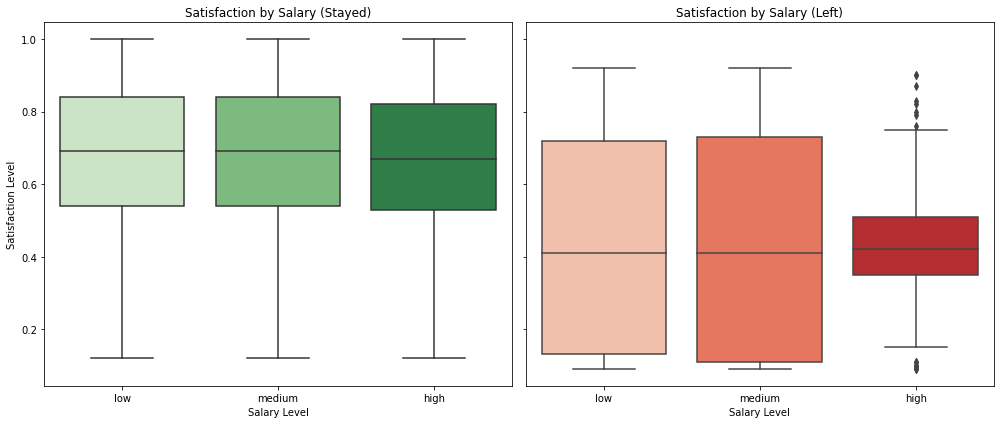

In [20]:
# Create a plot as needed



# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- 1. Employees who stayed (left = 0) ---
sns.boxplot(
    data=df1[df1['left'] == 0],
    x='salary',
    y='satisfaction_level',
    order=['low', 'medium', 'high'],
    palette='Greens',
    ax=axes[0]
)
axes[0].set_title('Satisfaction by Salary (Stayed)')
axes[0].set_xlabel('Salary Level')
axes[0].set_ylabel('Satisfaction Level')

# --- 2. Employees who left (left = 1) ---
sns.boxplot(
    data=df1[df1['left'] == 1],
    x='salary',
    y='satisfaction_level',
    order=['low', 'medium', 'high'],
    palette='Reds',
    ax=axes[1]
)
axes[1].set_title('Satisfaction by Salary (Left)')
axes[1].set_xlabel('Salary Level')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


## 📊 Employee Satisfaction by Salary Level

### Axes:
- **X-axis:** Salary levels (Low, Medium, High)  
- **Y-axis:** Satisfaction level (0 to 1 scale)

### Panels:
- **Left Panel:** Employees who **stayed**
- **Right Panel:** Employees who **left**

---

### 🟩 Left Panel – Stayed Employees
- Satisfaction levels are **consistently high** across all salary levels.
- **Medians** are fairly similar and **above 0.5**, indicating generally satisfied employees.
- **Higher salary** does **not dramatically change** satisfaction levels.
- **No major outliers** – satisfaction seems **stable and balanced**.

---

### 🟥 Right Panel – Left Employees
- **Lower satisfaction levels** overall compared to those who stayed.
- **Low and medium salary** groups show **wide variability** and **lower medians**.
- **High salary leavers** have a **tighter IQR** but also **many outliers**, suggesting:
  - A **smaller group**
  - More **polarized satisfaction** (some very dissatisfied despite high pay)

---

### ✅ Key Takeaways:
- **Higher satisfaction** is clearly linked to **employee retention**.
- **Low/medium salary** employees are **more likely to leave** when dissatisfied.
- **Salary alone doesn’t guarantee retention** – even **high earners may leave** if unhappy.


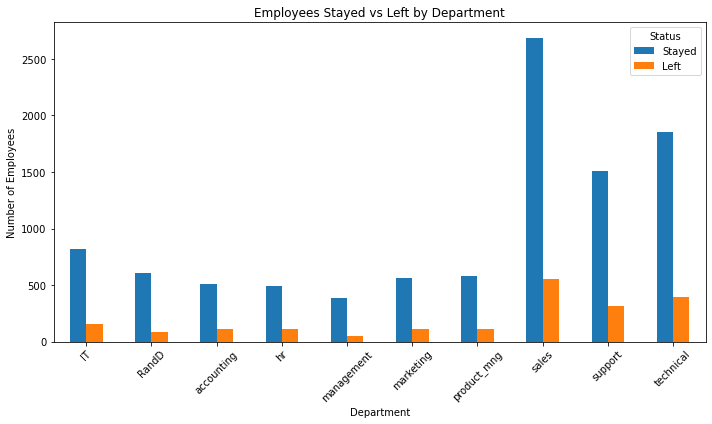

In [21]:
# Group by department and left status, count rows
dept_left_counts = df1.groupby(['department', 'left']).size().unstack(fill_value=0)

# Rename columns for clarity
dept_left_counts.columns = ['Stayed', 'Left']

# Plot with pandas
dept_left_counts.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Employees Stayed vs Left by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

### 📊 Interpretation of the Bar Chart

- **X-axis**: Departments  
- **Y-axis**: Number of Employees  
- **Hue**: Employment Status (`Stayed` vs `Left`)

---

### ✅ Key Insights

- **All Departments Have Attrition**  
  Every department has some employees who left, though the degree varies.

---

#### 🔹 Sales Department
- Has the **highest number of employees overall**, and also the **highest attrition**.
- Retains more people than it loses, but the **absolute number of leavers is substantial**.

---

#### 🔹 Technical, Support, and IT
- Show **moderate levels of attrition**.
- Suggest a need to assess **departmental working conditions or morale**.

---

#### 🔹 HR, Legal, and R&D
- Have **fewer employees** overall.
- While attrition is lower in absolute terms, the **proportion of people leaving could still be significant** due to smaller team sizes.

---

#### 🔹 Management and Accounting
- Show **relatively low attrition**, especially compared to their total headcount.


### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [23]:
# Copy the dataframe
df_encoded = df1.copy()

# Convert salary column to numerical by mapping
df_encoded['salary'] = df_encoded['salary'].map({'low': 0, 'medium':1, 'high': 2})

# Dummy encode the department column
df_encoded = pd.get_dummies(df_encoded, drop_first=False)

# Display the new dataframe
df_encoded.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Check Colinearity

In [24]:
df_encoded[['satisfaction_level', 'last_evaluation', 
            'number_project', 'average_monthly_hours', 'tenure']].corr(method='pearson')


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875
tenure,-0.152915,0.096829,0.188837,0.102875,1.000000


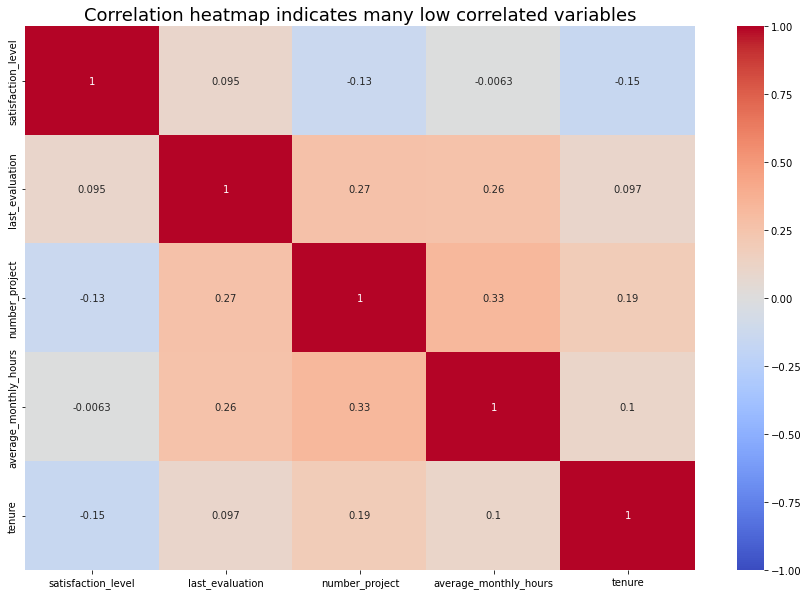

In [25]:
# Plot correlation heatmap

plt.figure(figsize=(15,10))

corr_matrix = df_encoded[['satisfaction_level', 'last_evaluation', 
            'number_project', 'average_monthly_hours', 'tenure']].corr()

sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

In [26]:
# Subset rows by removing outliers
df_encoded_final = df_encoded[(df_encoded['tenure'] >= lower_limit) & (df_encoded['tenure'] <= upper_limit)]

#Display the subset
df_encoded_final.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
10,0.45,0.54,2,135,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
df_encoded_final['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [28]:
# Isolate the target variable 
y = df_encoded_final['left']

# Display the target vaeiable
y.head(5)

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [29]:
# Select the features to be used in the model
X = df_encoded_final.drop('left', axis=1)

# Display the features dataframe
X.head(5)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


## Build Logistic Regression Model

In [30]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

In [31]:
# Construct a logitsic regression model and fit it to the training dataset
clf = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500).fit(X_tr, y_tr)

In [32]:
# Predict y values on the validation dataset
y_pred_log = clf.predict(X_val)

In [33]:
# Calculate and print relevant metrics to show model accuracy
log_accuracy = accuracy_score(y_val, y_pred_log)
log_precision = precision_score(y_val, y_pred_log)  # For positive class (e.g., 'Would Leave')
log_recall = recall_score(y_val, y_pred_log)
log_f1 = f1_score(y_val, y_pred_log)

print(f"Accuracy : {log_accuracy:.4f}")
print(f"Precision: {log_precision:.4f}")
print(f"Recall   : {log_recall:.4f}")
print(f"F1 Score : {log_f1:.4f}")

Accuracy : 0.8362
Precision: 0.5075
Recall   : 0.9271
F1 Score : 0.6559


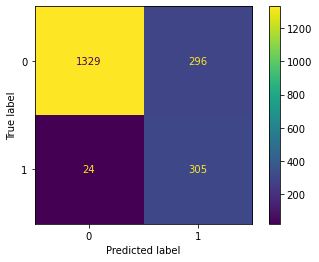

In [34]:
# Instantiate and display the confusion matrix
cm = confusion_matrix(y_val, y_pred_log, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot(values_format='')

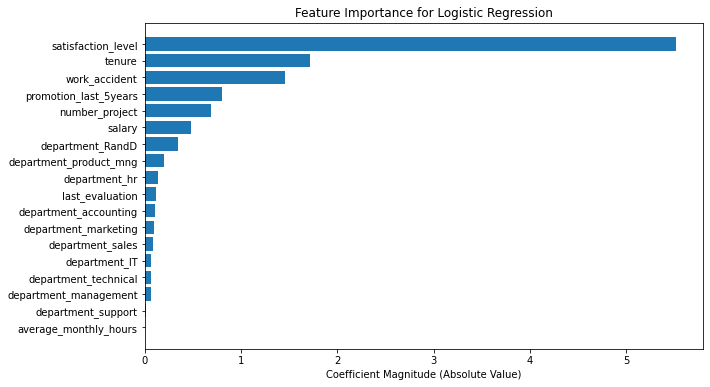

In [35]:

coefficients = clf.coef_[0]
feature_names = X.columns

# Create a DataFrame with feature names and absolute coefficient values
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(coefficients)
}).sort_values(by='importance', ascending=False)

# Plotting
plt.figure(figsize=(10,6))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.xlabel('Coefficient Magnitude (Absolute Value)')
plt.title('Feature Importance for Logistic Regression')
plt.gca().invert_yaxis()  # To have the highest importance on top
plt.show()


In [36]:
# Print the classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_val, y_pred_log, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.82      0.89      1625
    Predicted would leave       0.51      0.93      0.66       329

                 accuracy                           0.84      1954
                macro avg       0.74      0.87      0.77      1954
             weighted avg       0.90      0.84      0.85      1954



### 🔍 Insights

#### Class 0 – Would Not Leave:
- **Very high precision (0.98):** Nearly all predictions of "not leave" are correct.
- **Strong recall (0.82):** Model captures most of the actual "not leave" cases.
- **High F1-score (0.89):** Well-balanced performance for the majority class.

#### Class 1 – Would Leave:
- **Moderate precision (0.51):** About half of the predicted "leave" cases are actually correct.
- **Excellent recall (0.93):** The model correctly identifies most of the employees who would leave.
- **Reasonable F1-score (0.66):** Good balance considering class imbalance and business importance.

---

### 🧾 Conclusion

The model performs **very well overall**, especially in identifying employees who are **likely to leave** (**high recall = 0.93**).

While **precision for "would leave" (0.51)** could be improved, this model is **strong for retention use-cases**, where catching potential leavers is **more important than a few false alarms**.


## Build a Random Forest Model

In [37]:
# Instantiate model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [38]:
%%time
rf1.fit(X_tr, y_tr)

CPU times: user 6min 47s, sys: 6.19 s, total: 6min 53s
Wall time: 6min 53s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [39]:
# Check best AUC score on CV
rf1.best_score_

0.9790250657079222

In [40]:
# Obtain best parameters

rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [41]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [42]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [43]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [44]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

Double-click to enter your responses here.

In [45]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [46]:
y_pred_rf = rf1.best_estimator_.predict(X_val)
y_proba_rf = rf1.best_estimator_.predict_proba(X_val)[:,1]



In [47]:
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_precision = precision_score(y_val, y_pred_rf)  # For positive class (e.g., 'Would Leave')
rf_recall = recall_score(y_val, y_pred_rf)
rf_f1 = f1_score(y_val, y_pred_rf)

print(f"Accuracy : {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall   : {rf_recall:.4f}")
print(f"F1 Score : {rf_f1:.4f}")

Accuracy : 0.9437
Precision: 0.7731
Recall   : 0.9422
F1 Score : 0.8493


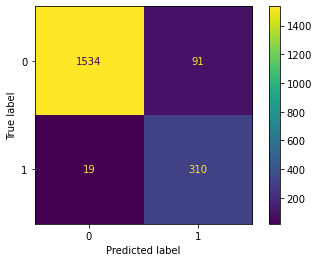

In [48]:
cm = confusion_matrix(y_val, y_pred_rf, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot(values_format='')

In [49]:
# Evaluation
print(classification_report(y_val, y_pred_rf, target_names=["Would Not Leave", "Would Leave"]))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("AUC Score:", roc_auc_score(y_val, y_proba_rf))

                 precision    recall  f1-score   support

Would Not Leave       0.99      0.94      0.97      1625
    Would Leave       0.77      0.94      0.85       329

       accuracy                           0.94      1954
      macro avg       0.88      0.94      0.91      1954
   weighted avg       0.95      0.94      0.95      1954

Confusion Matrix:
 [[1534   91]
 [  19  310]]
AUC Score: 0.9858180967968202


### 🔍 Insights

#### Class 0 – Would Not Leave:
- **Precision: 0.99** – The model is nearly perfect when it predicts someone will not leave.
- **Recall: 0.94** – It correctly identifies 94% of actual "would not leave" cases.
- **F1-score: 0.97** – Indicates excellent overall performance on this majority class.

#### Class 1 – Would Leave:
- **Precision: 0.77** – When the model predicts someone will leave, it's correct 77% of the time.
- **Recall: 0.94** – It correctly identifies 94% of actual leavers — excellent for a minority class.
- **F1-score: 0.85** – A strong balance between precision and recall for this important class.

---

### 📦 Confusion Matrix

- **True Negatives (Would Not Leave correctly predicted)**: 1,534  
- **False Positives (Predicted leave, but didn't)**: 91  
- **False Negatives (Predicted stay, but left)**: 19  
- **True Positives (Would Leave correctly predicted)**: 310

---

### 📈 AUC Score

- **AUC Score: 0.9858**  
  → Excellent area under the ROC curve, indicating strong separation between the two classes.

---

### 🧾 Conclusion

This model performs **exceptionally well overall**, especially in identifying employees **who are likely to leave** (high recall = 0.94).

The **low false negative rate (only 19)** and a high **AUC score (0.99)** make it a **highly reliable model** for employee retention use-cases.

Despite a slightly lower precision (0.77) for the "Would Leave" class, this is acceptable when the goal is to **minimize missed leavers**, even at the cost of some false alarms.


In [50]:
# Create a table of results to compare model performance.

### YOUR CODE HERE ###
table = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest'],
                      'F1': [log_f1, rf_f1],
                      'Recall': [log_recall, rf_recall],
                      'Precision': [log_precision, rf_precision],
                      'Accuracy': [log_accuracy, rf_accuracy]
                     }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.655914,0.927052,0.507488,0.836233
1,Random Forest,0.849315,0.942249,0.773067,0.943705


### ✅ Model Selection Summary


### 🏆 Best Model: **Random Forest Classifier**

#### 🎯 Reason for Selection:

- **Highest F1 Score (0.849)**: Indicates a strong balance between precision and recall, which is crucial in imbalanced classification problems.
- **Excellent Recall (0.942)**: The model correctly identifies 94% of actual leavers, making it very effective for retention-focused use cases.
- **Significantly better Precision (0.773)**: It avoids too many false positives — important to prevent unnecessary actions toward employees who wouldn't leave.
- **Highest Accuracy (0.944)**: Confirms overall strong predictive capability across both classes.

---

### 🧾 Conclusion

The **Random Forest model** outperforms Logistic Regression across **all key evaluation metrics**. It is especially strong at detecting potential leavers (high recall) while also maintaining good precision, making it **the most reliable and balanced model** for predicting employee attrition.


## Training the selected Model (Random Forest) on Training + Validation Data

In [51]:
# Combine X_train and X_val (if you split earlier)
X_final_train = pd.concat([X_train, X_val])
y_final_train = pd.concat([y_train, y_val])

# Create a dictionary of the best hyperparameters

opt_params = {'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

# Retrain
best_model = RandomForestClassifier(**opt_params)  
best_model.fit(X_final_train, y_final_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_test_pred = best_model.predict(X_test)

In [53]:
print(classification_report(y_test, y_test_pred, target_names=target_names))
print("AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))



                           precision    recall  f1-score   support

Predicted would not leave       0.98      1.00      0.99      2786
    Predicted would leave       0.98      0.92      0.95       565

                 accuracy                           0.98      3351
                macro avg       0.98      0.96      0.97      3351
             weighted avg       0.98      0.98      0.98      3351

AUC Score: 0.9799137914604629
Confusion Matrix:
 [[2778    8]
 [  48  517]]


                  feature  importance
0      satisfaction_level    0.527643
4                  tenure    0.163362
2          number_project    0.133739
1         last_evaluation    0.123082
3   average_monthly_hours    0.050746
17   department_technical    0.000280
7                  salary    0.000266
10  department_accounting    0.000252
16     department_support    0.000222
13   department_marketing    0.000134


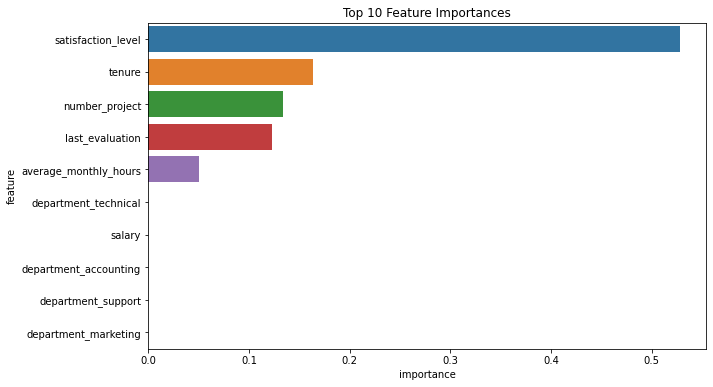

In [54]:
# Assume model is your trained model and X is your DataFrame of features

# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame for easy visualization
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Print top 10 features
print(feat_imp.head(10))

# Plot top 10
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

### 🔑 Feature Importance Interpretation

The model identifies the following features as most influential in predicting employee outcomes:

1. **Satisfaction Level (0.53 importance)**  
   The single most important feature, indicating that how satisfied an employee feels greatly impacts their likelihood to stay or leave.

2. **Tenure (0.16 importance)**  
   Employee length of service also plays a significant role, with longer tenure generally indicating more stability.

3. **Number of Projects (0.14 importance)**  
   The number of projects assigned to an employee influences their retention, possibly reflecting workload or engagement.

4. **Last Evaluation (0.12 importance)**  
   Recent performance evaluations contribute meaningfully to predictions, suggesting performance impacts attrition.

5. **Average Monthly Hours (0.05 importance)**  
   Hours worked per month has some impact, but less than the above factors.

---

### 📝 Additional Features

- Department-related features (e.g., technical, accounting, marketing) and salary have very low importance scores (near zero), indicating they contribute minimally to the model's decisions in this context.

---

### ⚙️ Summary

The model primarily relies on **employee satisfaction, tenure, workload (projects), and recent evaluations** to predict whether an employee will stay or leave. This insight suggests that HR interventions focusing on improving satisfaction and managing workload could be effective strategies for reducing attrition.


## Project Conclusion

The predictive model developed demonstrates strong ability to identify employees likely to leave, with an overall accuracy of 94% and excellent recall for the "would leave" class. Key drivers of attrition were found to be employee satisfaction, tenure, number of projects, and last performance evaluation scores. Department and salary factors showed minimal influence on predictions in this dataset.

## Recommendations

- **Focus on Employee Satisfaction:** Since satisfaction is the most important predictor, initiatives to improve workplace happiness and engagement should be prioritized.
- **Manage Workload Effectively:** Monitoring and balancing the number of projects assigned can reduce burnout and potential turnover.
- **Regular Performance Feedback:** Ensuring timely and constructive evaluations can help identify at-risk employees early.
- **Retention Strategies for Long-tenured Employees:** Tailored programs for employees with longer tenure can maintain their loyalty.

## Next Steps

1. **Validate the Model on New Data:** Test the model on future or external datasets to confirm generalizability.
2. **Implement a Real-time Monitoring System:** Deploy the model within HR platforms to flag at-risk employees proactively.
3. **Collect More Features:** Incorporate additional data such as employee engagement surveys, manager feedback, or external market trends to enhance prediction accuracy.
4. **Conduct Root Cause Analysis:** Use model insights to investigate underlying reasons behind dissatisfaction or workload issues.
5. **Iterate and Update the Model Regularly:** As organizational dynamics evolve, continuously retrain and tune the model with fresh data to maintain relevance.

---

This approach will help turn data insights into actionable HR strategies, ultimately reducing employee attrition and improving organizational stability.
